# Time Series

```{jupyter-info}
{rel-data-download}`bicycles.csv`
```

We start by loading the biycycles dataset into a `DataFrame` using the same code as in the last slide to index the data by the date.

In [1]:
# Some setup code to get the plotting library correct
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_csv('bicycles.csv', 
                 index_col='Date', parse_dates=True)

# Sorts the rows so the index is sorted
df = df.sort_index()  

df  # For display

East  West
Date                           
2012-10-03 00:00:00   4.0   9.0
2012-10-03 01:00:00   4.0   6.0
2012-10-03 02:00:00   1.0   1.0
2012-10-03 03:00:00   2.0   3.0
2012-10-03 04:00:00   6.0   1.0
...                   ...   ...
2019-03-31 19:00:00  30.0  58.0
2019-03-31 20:00:00  26.0  31.0
2019-03-31 21:00:00  18.0  15.0
2019-03-31 22:00:00   7.0  14.0
2019-03-31 23:00:00   6.0  10.0

[56904 rows x 2 columns]

Just like with any other `pandas` object, we can inspect the `index` of this `DataFrame` using the `.index` attribute.

In [3]:
df.index

DatetimeIndex(['2012-10-03 00:00:00', '2012-10-03 01:00:00',
               '2012-10-03 02:00:00', '2012-10-03 03:00:00',
               '2012-10-03 04:00:00', '2012-10-03 05:00:00',
               '2012-10-03 06:00:00', '2012-10-03 07:00:00',
               '2012-10-03 08:00:00', '2012-10-03 09:00:00',
               ...
               '2019-03-31 14:00:00', '2019-03-31 15:00:00',
               '2019-03-31 16:00:00', '2019-03-31 17:00:00',
               '2019-03-31 18:00:00', '2019-03-31 19:00:00',
               '2019-03-31 20:00:00', '2019-03-31 21:00:00',
               '2019-03-31 22:00:00', '2019-03-31 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=56904, freq=None)

So now to get a row for a particular date and time, we can index into the `DataFrame` using `loc`! The key difference here is that we will specify a string for the date-time rather than a number (since the index is the date-time).

In [4]:
df.loc['2019-03-31 15:00:00']

East    130.0
West    121.0
Name: 2019-03-31 15:00:00, dtype: float64

The incredibly powerful thing about using date-time as the index type is it allows us to do semantic indexing based on dates and times. Here are some examples:

You can pick just a date and it will include all rows from that date (meaning it will have all the times for that day).

In [5]:
df.loc['2017-03-31']

East   West
Date                             
2017-03-31 00:00:00    2.0    4.0
2017-03-31 01:00:00    2.0    0.0
2017-03-31 02:00:00    1.0    0.0
2017-03-31 03:00:00    1.0    0.0
2017-03-31 04:00:00    3.0    3.0
2017-03-31 05:00:00   23.0   14.0
2017-03-31 06:00:00   57.0   49.0
2017-03-31 07:00:00  163.0   99.0
2017-03-31 08:00:00  250.0  162.0
2017-03-31 09:00:00   90.0   70.0
2017-03-31 10:00:00   52.0   38.0
2017-03-31 11:00:00   39.0   31.0
2017-03-31 12:00:00   37.0   37.0
2017-03-31 13:00:00   52.0   34.0
2017-03-31 14:00:00   45.0   55.0
2017-03-31 15:00:00   74.0   87.0
2017-03-31 16:00:00   83.0  223.0
2017-03-31 17:00:00  145.0  333.0
2017-03-31 18:00:00  117.0  206.0
2017-03-31 19:00:00   50.0   84.0
2017-03-31 20:00:00   26.0   36.0
2017-03-31 21:00:00   16.0   40.0
2017-03-31 22:00:00   12.0   22.0
2017-03-31 23:00:00    5.0   15.0

You could also leave off the day to get all of the rows for a year and month.

In [6]:
df.loc['2017-03']

East  West
Date                           
2017-03-01 00:00:00   1.0   2.0
2017-03-01 01:00:00   2.0   2.0
2017-03-01 02:00:00   1.0   1.0
2017-03-01 03:00:00   1.0   0.0
2017-03-01 04:00:00   3.0   3.0
...                   ...   ...
2017-03-31 19:00:00  50.0  84.0
2017-03-31 20:00:00  26.0  36.0
2017-03-31 21:00:00  16.0  40.0
2017-03-31 22:00:00  12.0  22.0
2017-03-31 23:00:00   5.0  15.0

[744 rows x 2 columns]

Unsurprisingly, you can also just get all the rows for a year. All of these examples are accomplished by interpreting the value you are using to index as a date-time, and then selecting all the rows that match that date-time. If you just specify a year, it finds all rows that have that year.

In [7]:
df.loc['2017']

East  West
Date                           
2017-01-01 00:00:00   0.0   5.0
2017-01-01 01:00:00   5.0  14.0
2017-01-01 02:00:00   1.0   0.0
2017-01-01 03:00:00   0.0   2.0
2017-01-01 04:00:00   0.0   1.0
...                   ...   ...
2017-12-31 19:00:00   9.0  12.0
2017-12-31 20:00:00   6.0   8.0
2017-12-31 21:00:00   3.0  10.0
2017-12-31 22:00:00   7.0   6.0
2017-12-31 23:00:00   7.0   9.0

[8760 rows x 2 columns]

You can also use ranges to select multiple years!

In [8]:
df.loc['2017':'2018']  # All rows from 2017 to 2018 (inclusive for pandas)

East  West
Date                           
2017-01-01 00:00:00   0.0   5.0
2017-01-01 01:00:00   5.0  14.0
2017-01-01 02:00:00   1.0   0.0
2017-01-01 03:00:00   0.0   2.0
2017-01-01 04:00:00   0.0   1.0
...                   ...   ...
2018-12-31 19:00:00   9.0   5.0
2018-12-31 20:00:00  12.0  14.0
2018-12-31 21:00:00   7.0   7.0
2018-12-31 22:00:00   3.0   4.0
2018-12-31 23:00:00   7.0   6.0

[17520 rows x 2 columns]

# Plotting
In Lesson 10, we will spend time discussing how to plot data and how to interpret those visualizations. `pandas` provides some basic functionality for plotting.

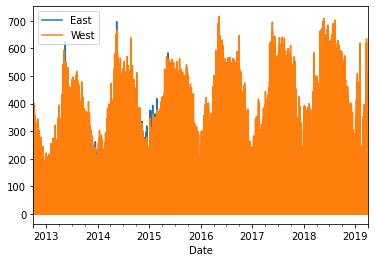

In [9]:
df.plot()

This is not exactly readable... The problem is the data is too "high resolution": it's drawing a line for every hour of every day for 6 years! No wonder we can't actually see anything.

What we need is to "resample" the data so the data points occurr less frequently. One way to do this would be to just drop every row besides Sundays at 12pm (arbitrarily decided), but you can tell that won't work because it won't give us a good idea of overall biking trends. Instead, it would be nice if we could re-organize the data so each row was the total number of bikers in a week (just for example).

This sounds somewhat similar to a group-by, but turns out to work quite differently (more on this in next section). To change the time series to have the granularity of every week and then plot that, we use the `resample` method. In the next cell, we transform the data so each row is a time-span of a week and has the sum of all the bikers for the hours in that week.

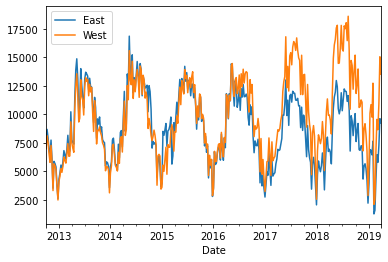

In [10]:
weekly = df.resample('W').sum()
weekly.plot()

Much more legible! Now we can see both East and West traffic. Looking at the graphs, we see some seasonality in the data - there are peaks in the summer and troughs in the winter. 

`'W'` is a special code for `resample` to tell it to resample by week. There are many other codes you can pass to it instead!
* `'D'` = day
* `'W'` = week
* `'M'` = month
* `'A'` = year
* [And much much more!](https://pandas.pydata.org/pandas-docs/version/0.17.0/timeseries.html#offset-aliases)

Generally when analyzing time series, you are interested in looking at two metrics of describing the series.
* Its **trend**, which shows how the average value changes over time. This dataset seems to have no obvious upward or downward trend (the average number of bicyclers, in say a year, are about the same).
* Its **seasonality**, which shows how the sequence fluctuates over some period. This series definitely has some seasonality to it since it goes up and down in relatively the same pattern each year.

# Resample vs Group By
Earlier, we showed that to change the time series to be by week, instead of by hour, we used a `resample`. We commented that we didn't actually want to use `groupby` because these are fundamentally different operations.

To show you that these in-fact, are different, we can try using a `groupby` to solve the problem. If we want to access the `week` for each row, we can use `df.index.week`. `df.index` returns the date-time index and `.week` gets the week value from each row. The week value will be a number from 0 to 52, indicating which week that date-time is in.

In the cell below, we `groupby` this week value and then plot the result.

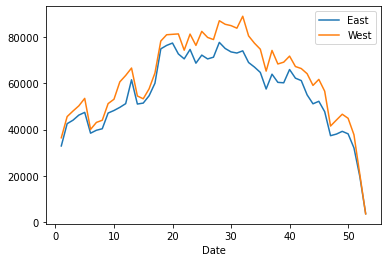

In [11]:
weekly_groupby = df.groupby(df.index.week).sum()
weekly_groupby.plot()

Wow! Why does that look so different?!?!

It has to do with how `groupby` works and the fact that we tried to group by the week-number. As we said before, `df.index.week` will be a `Series` of numbers between 0 and 52, indicating which week the date-time fell in. However, this causes a problem for the same week in different years! 

Consider `Jan 2, 2018` and `Jan 5, 2019`. Both of those `.week` values will be `0` since they are in the first week! The year information was lost! They will end up landing in the same group, which is why we can see that graph only goes from 0 to 52!

Instead, we want to do some kind of grouping based on the weeks themselves. We want `Jan 2, 2018` and `Jan 5, 2019` to go into separate groups with their respective date-times that are in the same week. 

While it is actually possible to try to put something together that works and uses `groupby`, we will not go into that here. Instead, `resample` is an operation precisely meant to make this easier! You just tell `pandas` you want to resample by week, and it figures that out for you! 

There is a lot more complexity you can get into with time series. For example, `resample` turns out to be much more complicated since you can use it to **downsample** (throw away data)  or **upsample** (create new data) so that the data are sampled at the desired frequency. There are too many details to go into that here, but you may learn more from [`pandas` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html)!